In [6]:
import os

import numpy as np
import pandas as pd

import cv2
from PIL import Image

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

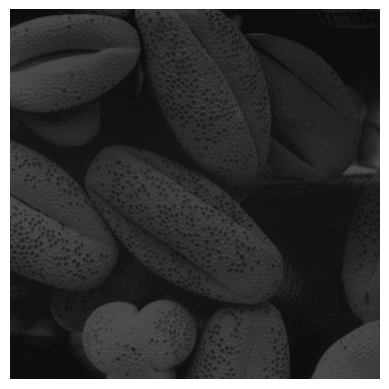

In [7]:
img = Image.open("../DIP3E_Original_Images_CH03/Fig0316(4)(bottom_left).tif")
img = np.asarray(img)

plt.imshow(img, cmap = 'gray', vmin = 0, vmax = 255)
plt.axis('off');

In [9]:
def imhist(img):
    row, col = img.shape
    h = [0] * 256

    for i in range(row):
        for j in range(col):
            h[img[i, j]] += 1
    
    return np.array(h)/(row*col)

def cumsum(h):
    return [sum(h[:i+1]) for i in range(len(h))]

def hist_eq(img):
    h = imhist(img)
    cdf = np.array(cumsum(h)) 
    sk = np.uint8(255 * cdf)
    s1, s2 = img.shape
    Y = np.zeros_like(img)
    
    for i in range(s1):
        for j in range(s2):
            Y[i, j] = sk[img[i, j]]
            
    H = imhist(Y)
    return Y, h, H, sk

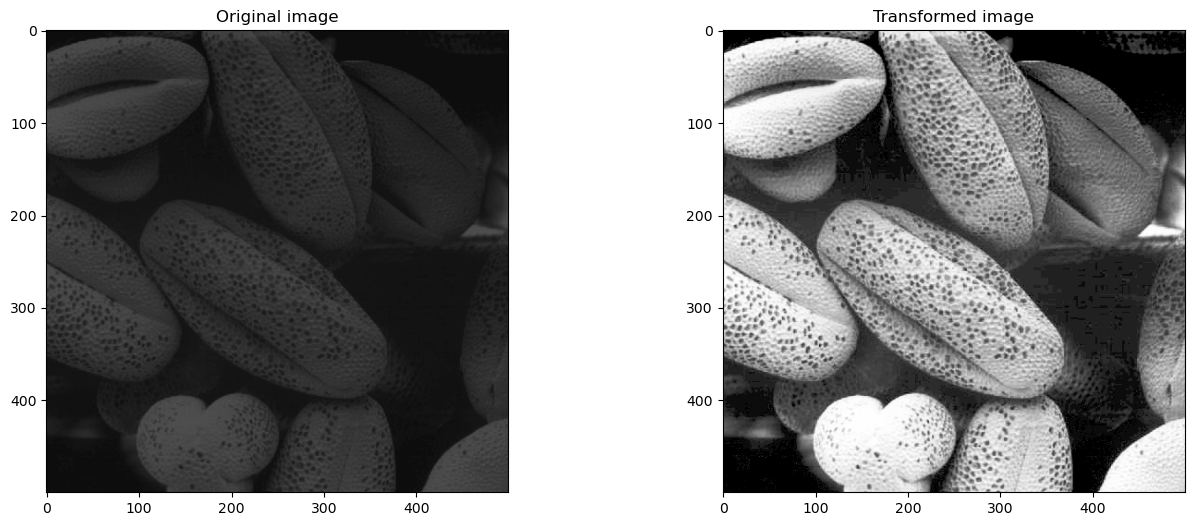

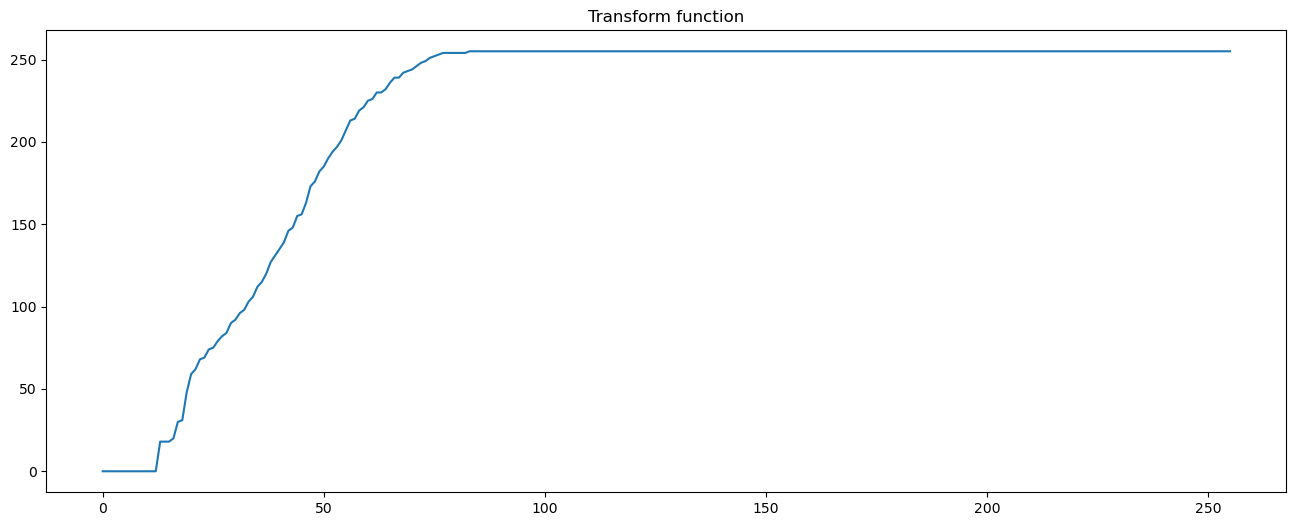

In [19]:
Y, h, H, sk = hist_eq(img)

plt.figure(figsize = (16, 6))
plt.subplot(121)
plt.title('Original image')
plt.imshow(img, cmap = 'gray', vmin = 0, vmax = 255)

plt.subplot(122)
plt.title('Transformed image')
plt.imshow(Y, cmap = 'gray')

plt.figure(figsize = (16, 6))
plt.title('Transform function')
plt.plot(sk)